In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking the number of rows and columns in the dataset
print(dataset.shape)
dataset.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#checking the number of missing values in the dataset
print(dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
#checking the type of our dataset
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

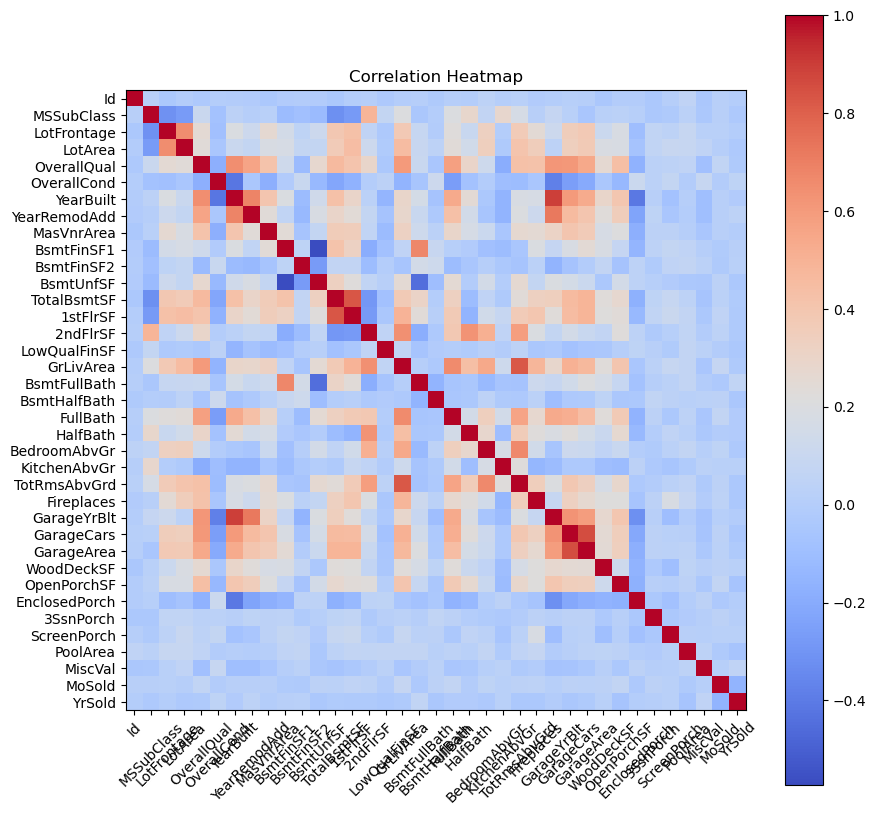

In [6]:
features = dataset.iloc[:, :-1].select_dtypes(exclude=['object'])  # Select all columns except the last one
target = dataset.iloc[:, -1]  # Select the last column as the target variable
correlation_matrix = features.corr()  # Default is Pearson correlation
correlation_matrix = features.corr(method='spearman')
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(features.columns)), features.columns, rotation=45)
plt.yticks(range(len(features.columns)), features.columns)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
#preprocessing the data for further consideration
target = 'SalePrice'
X=dataset.drop(columns= target, axis=1).select_dtypes(exclude=['object'])
y=dataset[target]
c
deep_copy = train_X

In [11]:
#filling in the missing values in the dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)
print(train_X.shape)

(1095, 37)


In [12]:
#using XGBRegressor as the ML model
from xgboost import XGBRegressor
model1 = XGBRegressor()
model1.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
xg_pred = model1.predict(test_X)
print("Mean squared error: ", mean_squared_error(test_y,xg_pred))
print("R-squared:", r2_score(test_y,xg_pred))

Mean squared error:  819483122.9811614
R-squared: 0.8830197045043278


In [14]:
#using LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)
pred_y = model.predict(train_X)
print("Mean Squared Error:", mean_squared_error(train_y, pred_y))
print("R-squared:", r2_score(train_y, pred_y))
test_pred_y = model.predict(test_X)
print("Mean Squared Error:", mean_squared_error(test_y, test_pred_y))
print("R-squared:", r2_score(test_y, test_pred_y))

Mean Squared Error: 1186276406.635221
R-squared: 0.8046138306269087
Mean Squared Error: 1232512200.545061
R-squared: 0.8240602675290276


In [15]:
print(train_X.shape)
print(train_y.shape)

(1095, 37)
(1095,)


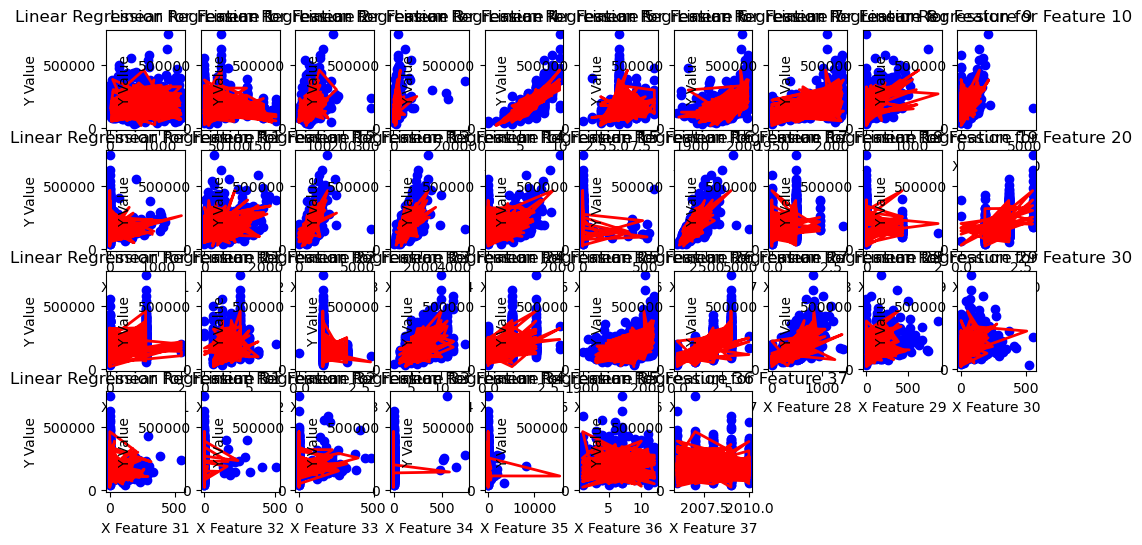

In [79]:
# Plot the scatter plot with regression line
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
for i in range(train_X.shape[1]):  # Iterate over each feature
    plt.subplot(4, 10, i+1)  # Arrange subplots (adjust grid as needed)
    plt.scatter(train_X[:, i], train_y, color='blue', label='Actual')
    plt.plot(test_X[:, i], test_pred_y, color='red', linewidth=2, label='Predicted')
    plt.xlabel(f"X Feature {i+1}")  # Label each feature
    plt.ylabel('Y Value')
    plt.title(f"Linear Regression for Feature {i+1}")
    #plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [16]:
#Scaling the features for a better fit to the models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [17]:
scaled_pred = model1.predict(scaled_test_X)
print("Mean Squared Error:", mean_squared_error(scaled_pred, test_y))
print("R-squared:", r2_score(test_y, scaled_pred))

Mean Squared Error: 26044435575.584835
R-squared: -2.717813929549286


In [18]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [19]:
ids = test_df['Id']
ids.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [20]:
#Now using the actual test dataset to predict
final_test_X=test_df.select_dtypes(exclude=['object'])
print(final_test_X.shape)
test_X_transformed = imputer.transform(final_test_X)
predictions = model.predict(test_X_transformed)

(1459, 37)


In [54]:
#saving the predictions in a csv file
data = {'Id': ids, 'SalePrice': predictions}
df = pd.DataFrame(data)
df.to_csv('submission.csv', index=False)

In [55]:
xg_predictions = model1.predict(test_X_transformed)
#saving them into another file
data = {'Id': ids, 'SalePrice': xg_predictions}
df = pd.DataFrame(data)
df.to_csv('xg_submission.csv', index=False)

In [21]:
#Scaling the values of the test file
scaled_final_test_X = scaler.transform(test_X_transformed)


#using the xg model for the predictions
scaled_xg_predictions = model1.predict(scaled_final_test_X)

In [22]:
#further tuning the xgmodel without scaling the features
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=10, 
             eval_set=[(test_X, test_y)], verbose=False)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
#Using the tuned model for further predictions
tuned_preds = my_model.predict(test_X)
print("Mean Squared Error:", mean_squared_error(test_y, tuned_preds))
print("R-squared:", r2_score(test_y, tuned_preds))

Mean Squared Error: 809661563.0351479
R-squared: 0.8844217211566457


In [24]:
#tuned the parameters to check if it gave some better results to the actual test dataset
try_pred = my_model.predict(test_X_transformed)
data = {'Id': ids, 'SalePrice': try_pred}
df = pd.DataFrame(data)
df.to_csv('tuned_xg.csv', index=False)